# KNN 분류

KNN은 K - Nearest - Neighbors의 약칭

<img width="850" alt="005-1" src="https://user-images.githubusercontent.com/63298243/125044286-c94fb780-e0d6-11eb-8e43-a609b3099c98.png">

새로운 관측값이 주어지면 기존 데이터 중에서 가장 속성이 비슷한 K개의 이웃을 먼저 찾음  

가까운 이웃들이 갖고 있는 목표 값과 같은 값으로 분류하여 예측
<br><br><br>
K의 값에 따라 예측의 정확도가 달라지므로 적절한 K값을 찾는 것이 매우 중요
<br><br><br>
새로운 관측 point에 대해 기존 데이터와의 점과 점 사이의 거리를 통해서 최근접 데이터를 찾을 수 있음

# Import library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 

# Load data

In [2]:
df = sns.load_dataset('titanic')

# EDA

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 데이터 자료형 확인

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


### 데이터 결측치 확인

In [5]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### 데이터 통계 요약정보 확인

In [6]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 컬럼 전체의 고유값 확인

In [7]:
for i in range(len(df.columns.values)):
    print(df.columns.values[i])
    print(df[df.columns.values[i]].unique())
    print()

survived
[0 1]

pclass
[3 1 2]

sex
['male' 'female']

age
[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]

sibsp
[1 0 3 4 2 5 8]

parch
[0 1 2 5 3 4 6]

fare
[  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.687

#### NaN값이 많은 deck 열을 삭제, embarked와 내용이 겹치는 embark_town 열을 삭제

In [8]:
df = df.drop(['deck', 'embark_town'], axis=1)  
print(df.columns.values)

['survived' 'pclass' 'sex' 'age' 'sibsp' 'parch' 'fare' 'embarked' 'class'
 'who' 'adult_male' 'alive' 'alone']


#### age 열에 나이 데이터가 없는 모든 행을 삭제 - age 열(891개 중 177개의 NaN 값)

In [9]:
df = df.dropna(subset=['age'], how='any', axis=0)  
print(len(df))

714


#### embarked 열의 NaN값을 승선도시 중에서 가장 많이 출현한 값으로 치환

In [10]:
most_freq = df['embarked'].value_counts(dropna=True).idxmax()   
print(most_freq)

S


In [11]:
df['embarked'].fillna(most_freq, inplace=True)

In [12]:
df.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
count,714.000000,714.000000,714,714.000000,714.000000,714.000000,714.000000,714,714,714,714,714,714
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,no,True
freq,NaN,NaN,453,NaN,NaN,NaN,NaN,556,355,413,413,424,404
mean,0.406162,2.236695,NaN,29.699118,0.512605,0.431373,34.694514,NaN,NaN,NaN,NaN,NaN,NaN
std,0.491460,0.838250,NaN,14.526497,0.929783,0.853289,52.918930,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,1.000000,NaN,20.125000,0.000000,0.000000,8.050000,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,2.000000,NaN,28.000000,0.000000,0.000000,15.741700,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,1.000000,33.375000,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.isna().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

In [14]:
df['sex'].unique()

array(['male', 'female'], dtype=object)

In [15]:
df['embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

## 상관관계 히트맵

<AxesSubplot:>

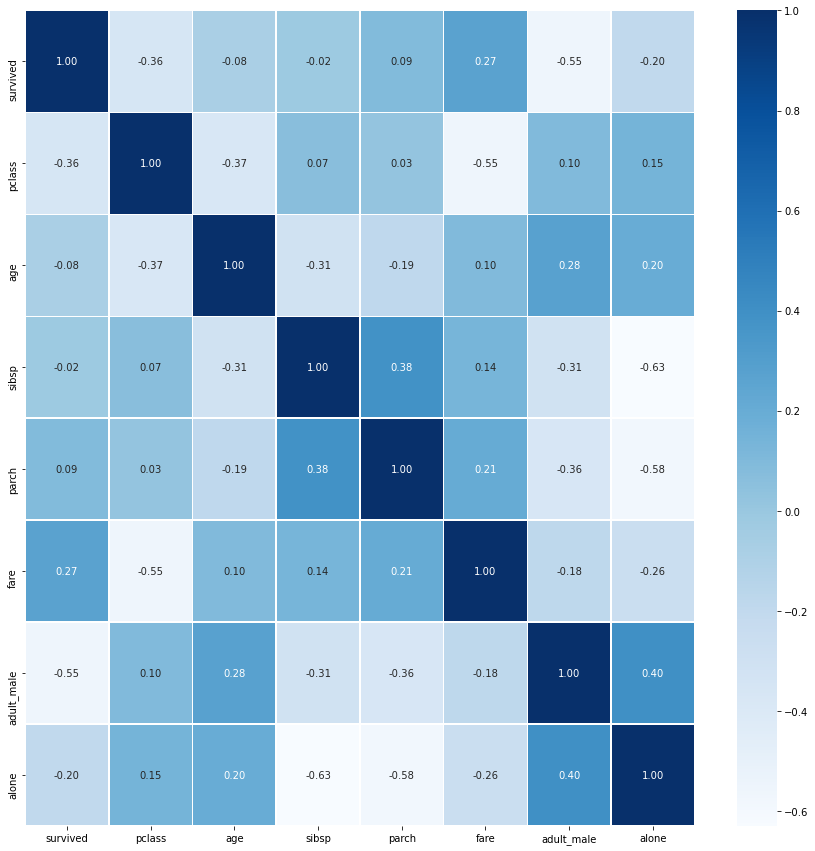

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [16]:
features = df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]

In [17]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  714 non-null    int64  
 1   pclass    714 non-null    int64  
 2   sex       714 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     714 non-null    int64  
 5   parch     714 non-null    int64  
 6   embarked  714 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 44.6+ KB


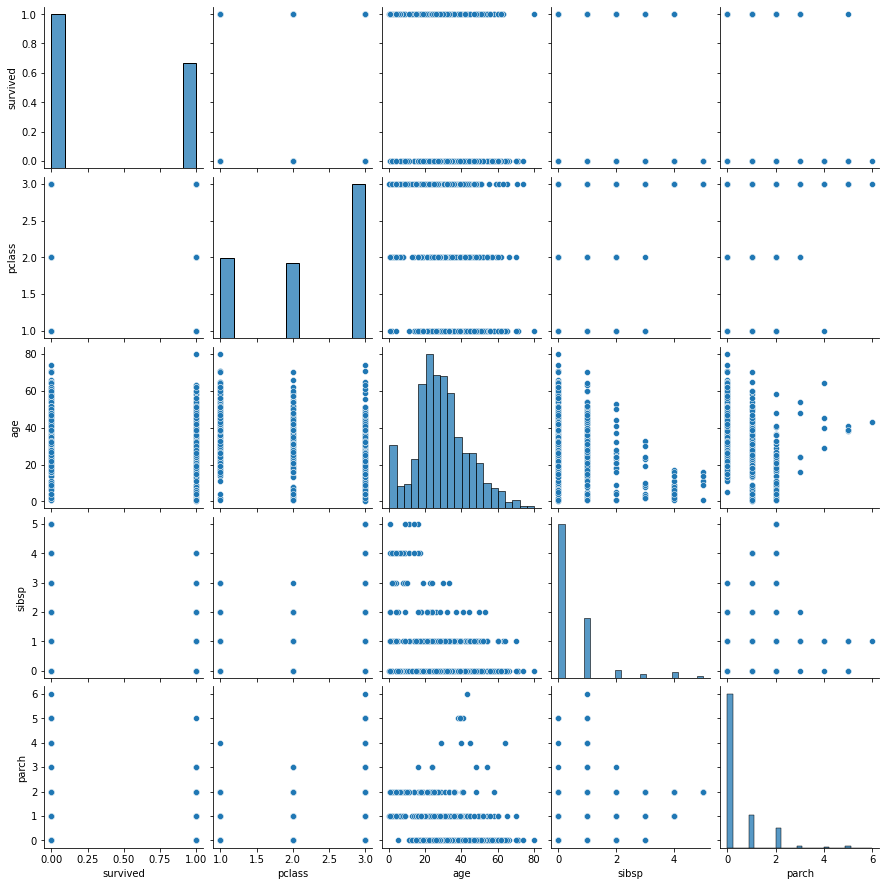

In [18]:
sns.pairplot(features)  
plt.show()

## 원핫인코딩 - 범주형 데이터를 모델이 인식할 수 있도록 숫자형으로 변환

성별에 대한 원핫인코딩

In [19]:
features['sex']

0        male
1      female
2      female
3      female
4        male
        ...  
885    female
886      male
887    female
889      male
890      male
Name: sex, Length: 714, dtype: object

In [20]:
onehot_sex = pd.get_dummies(features['sex'])

In [21]:
onehot_sex

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
885,1,0
886,0,1
887,1,0
889,0,1


In [22]:
features

,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,Q
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
889,1,1,male,26.0,0,0,C


In [23]:
features = pd.concat([features, onehot_sex], axis=1)

In [24]:
features

,survived,pclass,sex,age,sibsp,parch,embarked,female,male
0,0,3,male,22.0,1,0,S,0,1
1,1,1,female,38.0,1,0,C,1,0
2,1,3,female,26.0,0,0,S,1,0
3,1,1,female,35.0,1,0,S,1,0
4,0,3,male,35.0,0,0,S,0,1
...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,Q,1,0
886,0,2,male,27.0,0,0,S,0,1
887,1,1,female,19.0,0,0,S,1,0
889,1,1,male,26.0,0,0,C,0,1


In [25]:
features.isna().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
embarked    0
female      0
male        0
dtype: int64

embarked에 대한 원핫인코딩

In [26]:
onehot_embarked = pd.get_dummies(features['embarked'], prefix='town')
features = pd.concat([features, onehot_embarked], axis=1)

In [27]:
onehot_embarked

,town_C,town_Q,town_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
885,0,1,0
886,0,0,1
887,0,0,1
889,1,0,0


In [28]:
features

,survived,pclass,sex,age,sibsp,parch,embarked,female,male,town_C,town_Q,town_S
0,0,3,male,22.0,1,0,S,0,1,0,0,1
1,1,1,female,38.0,1,0,C,1,0,1,0,0
2,1,3,female,26.0,0,0,S,1,0,0,0,1
3,1,1,female,35.0,1,0,S,1,0,0,0,1
4,0,3,male,35.0,0,0,S,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,Q,1,0,0,1,0
886,0,2,male,27.0,0,0,S,0,1,0,0,1
887,1,1,female,19.0,0,0,S,1,0,0,0,1
889,1,1,male,26.0,0,0,C,0,1,1,0,0


원핫인코딩 전의 기존 칼럼 제거

In [29]:
features.drop(['sex', 'embarked'], axis=1, inplace=True)

In [30]:
features.head()

,survived,pclass,age,sibsp,parch,female,male,town_C,town_Q,town_S
0,0,3,22.0,1,0,0,1,0,0,1
1,1,1,38.0,1,0,1,0,1,0,0
2,1,3,26.0,0,0,1,0,0,0,1
3,1,1,35.0,1,0,1,0,0,0,1
4,0,3,35.0,0,0,0,1,0,0,1


# Modeling

In [31]:
X=features[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 'town_C', 'town_Q', 'town_S']]  #독립 변수 X
y=features['survived']                      #종속 변수 Y

In [32]:
X

,pclass,age,sibsp,parch,female,male,town_C,town_Q,town_S
0,3,22.0,1,0,0,1,0,0,1
1,1,38.0,1,0,1,0,1,0,0
2,3,26.0,0,0,1,0,0,0,1
3,1,35.0,1,0,1,0,0,0,1
4,3,35.0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
885,3,39.0,0,5,1,0,0,1,0
886,2,27.0,0,0,0,1,0,0,1
887,1,19.0,0,0,1,0,0,0,1
889,1,26.0,0,0,0,1,1,0,0


#### 독립 변수 데이터를 정규화(normalization)

In [36]:
X = StandardScaler().fit(X).transform(X)

In [37]:
X

array([[ 0.91123237, -0.53037664,  0.52457013, ..., -0.47180795,
        -0.20203051,  0.53307848],
       [-1.47636364,  0.57183099,  0.52457013, ...,  2.11950647,
        -0.20203051, -1.87589641],
       [ 0.91123237, -0.25482473, -0.55170307, ..., -0.47180795,
        -0.20203051,  0.53307848],
       ...,
       [-1.47636364, -0.73704057, -0.55170307, ..., -0.47180795,
        -0.20203051,  0.53307848],
       [-1.47636364, -0.25482473, -0.55170307, ...,  2.11950647,
        -0.20203051, -1.87589641],
       [ 0.91123237,  0.15850313, -0.55170307, ..., -0.47180795,
         4.94974747, -1.87589641]])

#### train data 와 test data로 구분

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=20) 

In [39]:
print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)

train data 개수:  (499, 9)
test data 개수:  (215, 9)


#### 모델 객체 생성 (k=5로 설정)

In [40]:
knn = KNeighborsClassifier(n_neighbors=5)

#### train data를 가지고 모형 학습

In [41]:
knn.fit(X_train, y_train)   

KNeighborsClassifier()

#### test data를 가지고 y_hat을 예측 (분류) 

In [42]:
y_hat = knn.predict(X_test)

In [43]:
print(y_hat[0:10])
print(y_test.values[0:10])

[1 1 1 1 1 1 0 0 0 0]
[1 1 1 1 0 1 0 1 0 1]


### 모델 성능 평가

confusion matrix & classification report

In [44]:
r_square = knn.score(X_test, y_test)
print(r_square)

0.8465116279069768


In [45]:
knn_matrix = metrics.confusion_matrix(y_test, y_hat)  
print(knn_matrix)

[[113  11]
 [ 22  69]]


In [46]:
knn_report = metrics.classification_report(y_test, y_hat)            
print(knn_report)

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       124
           1       0.86      0.76      0.81        91

    accuracy                           0.85       215
   macro avg       0.85      0.83      0.84       215
weighted avg       0.85      0.85      0.84       215

